<a href="https://colab.research.google.com/github/KolteP/hello-open-source/blob/master/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

#Stock Investment

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# get market data
dataNFLX = yf.download('NFLX', '2008-01-01', date.today(), auto_adjust=True)
dataDIS = yf.download('DIS', '2008-01-01', date.today(), auto_adjust=True)
#dataBOND = yf.download('^TNX', '2008-01-01', date.today(), auto_adjust=True)
dataBNTX = yf.download('BNTX', '2008-01-01', date.today(), auto_adjust=True)

# better solution
for d in [dataNFLX, dataDIS, dataBNTX]:
  if "Date" not in d.columns:
    d.reset_index(inplace=True)

#
dataNFLX["Ticker"] = "NFLX"
dataDIS["Ticker"] = "Disney"
dataBNTX["Ticker"] = "BioN"


stock = pd.concat([dataNFLX, dataDIS, dataBNTX], axis=0)
stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Volume,Ticker
0,2008-01-02,3.794286,3.892857,3.662857,3.764286,12527900,NFLX
1,2008-01-03,3.991429,4.042857,3.664286,3.724286,21340200,NFLX
2,2008-01-04,3.720000,3.795714,3.478571,3.515714,17202500,NFLX
3,2008-01-07,3.530000,3.564286,3.385714,3.554286,12693800,NFLX
4,2008-01-08,3.542857,3.552857,3.247143,3.328571,14490000,NFLX
...,...,...,...,...,...,...,...
557,2021-12-27,253.240005,259.899994,250.229996,254.839996,1514800,BioN
558,2021-12-28,250.350006,256.484985,238.270004,241.399994,2551600,BioN
559,2021-12-29,235.119995,244.300003,231.729996,240.610001,2713700,BioN
560,2021-12-30,239.020004,258.820007,238.000000,256.809998,2353500,BioN


In [ ]:
#import yfinance as yf

#msft = yf.Ticker("NFLX")
#hist = msft.history(period="max")
#hist

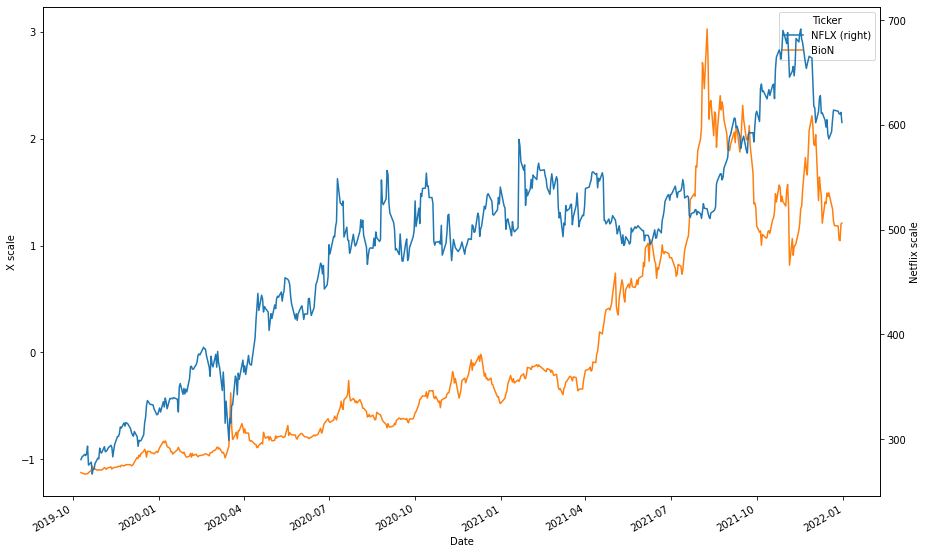

In [ ]:
from sklearn.preprocessing import StandardScaler
data_gr = stock[['Ticker','Close','Date']].pivot_table(index='Date', columns='Ticker', values='Close').dropna()
#X = data_gr[['NFLX', 'Disney', 'BioN']].copy()
X = data_gr[['NFLX','BioN']].copy()
scaleX = StandardScaler().fit(X)
data_std = pd.DataFrame(scaleX.transform(X), index=X.index, columns=X.columns)
data_std['NFLX'] = data_gr.NFLX.copy()
ax = data_std.plot(secondary_y=['NFLX'], figsize=(15,10))
ax.set_ylabel('X scale')
ax.right_ax.set_ylabel('Netflix scale');

In [ ]:
# set the forcast scope 
n = 7
# create new dataset with emty rows for futur forcasts
data_fcst = data_std.copy()
data_fcst = data_fcst.append(pd.DataFrame(index = pd.date_range(start=date.today(), periods=n, freq='D')))

data_fcst = data_fcst.assign(**{
    f'{col}_lag': data_fcst[col].shift(n)
    for col in ['BioN']})
data_fcst = data_fcst.drop(['BioN'], axis=1).dropna(subset=['BioN_lag'])

In [ ]:
from statsmodels.formula.api import ols

modFRCST = ols(formula='NFLX ~ + BioN_lag', # + Month + Year
          data=data_fcst)

resFRCST = modFRCST.fit()

#we print the result
print(resFRCST.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                   NFLX   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     685.0
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           7.75e-99
Time:                        19:49:38   Log-Likelihood:                -3106.1
No. Observations:                 555   AIC:                             6216.
Df Residuals:                     553   BIC:                             6225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    485.4117      2.773    175.034      0.0

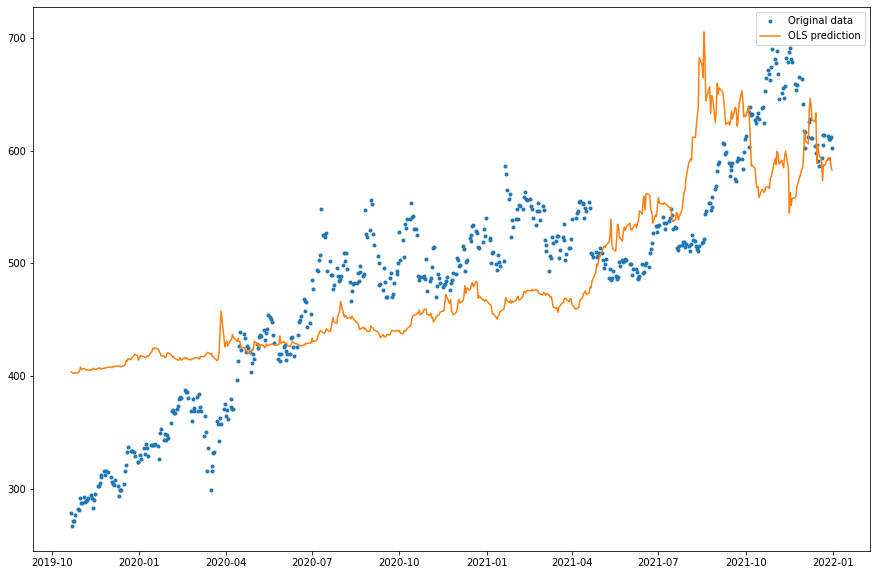

In [ ]:
 #predict out of sample
 import matplotlib.pyplot as plt
xTrain = data_fcst.loc[data_fcst.index < pd.to_datetime(date.today()),['BioN_lag']].copy()
yTrain = data_fcst.loc[data_fcst.index < pd.to_datetime(date.today()),['NFLX']].copy()
ypred = resFRCST.predict(xTrain)  
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(xTrain.index, yTrain, ".", label="Original data")
ax.plot(xTrain.index, ypred, "-", label="OLS prediction")
ax.legend(loc="best")
#ax.set_xlim(xmin=pd.to_datetime('2021-06-01'),xmax=pd.to_datetime('2021-12-20'));

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


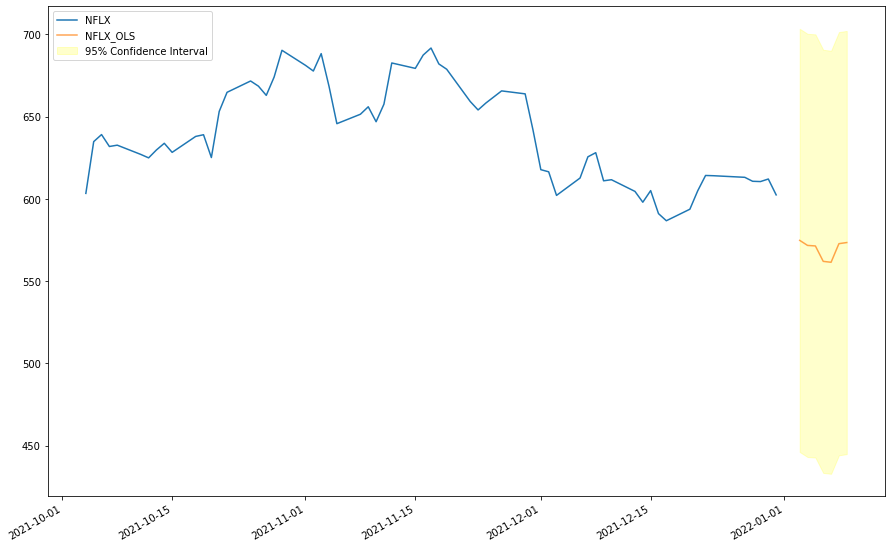

In [ ]:
# predict out of sample
data_y = data_fcst[data_fcst.index >= pd.to_datetime(date.today()- timedelta(days=1))]
data_y['NFLX_OLS'] = resFRCST.predict(data_y)  
ax = data_fcst[data_fcst.index > pd.to_datetime('10/01/2021')].plot(y=['NFLX'],figsize=(15,10))
data_y.plot(y=['NFLX_OLS'], ax=ax, alpha=.7)

pred = resFRCST.get_prediction(data_y)
iv_l = pred.summary_frame()["obs_ci_lower"]
iv_u = pred.summary_frame()["obs_ci_upper"]

ax.fill_between(data_y.index,
                iv_l,
                iv_u, color='yellow', alpha=0.2,
                label='95% Confidence Interval')
ax.legend(loc='upper left');

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# define the model
model = RandomForestRegressor(n_estimators=1000, random_state=42)
# fit the model on the whole dataset
model.fit(xTrain, yTrain)
yPred = model.predict(xTrain)

# check accuracy in training data
from sklearn.metrics import r2_score
print('R2: {}'.format(r2_score(yTrain, yPred)))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yTrain,yPred)
rootmeansq = np.sqrt(mse)
print('mse: {}'.format(mse))
print('rmse: {}'.format(rootmeansq))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


R2: 0.9761184134563161
mse: 227.32508459939666
rmse: 15.077303624965461


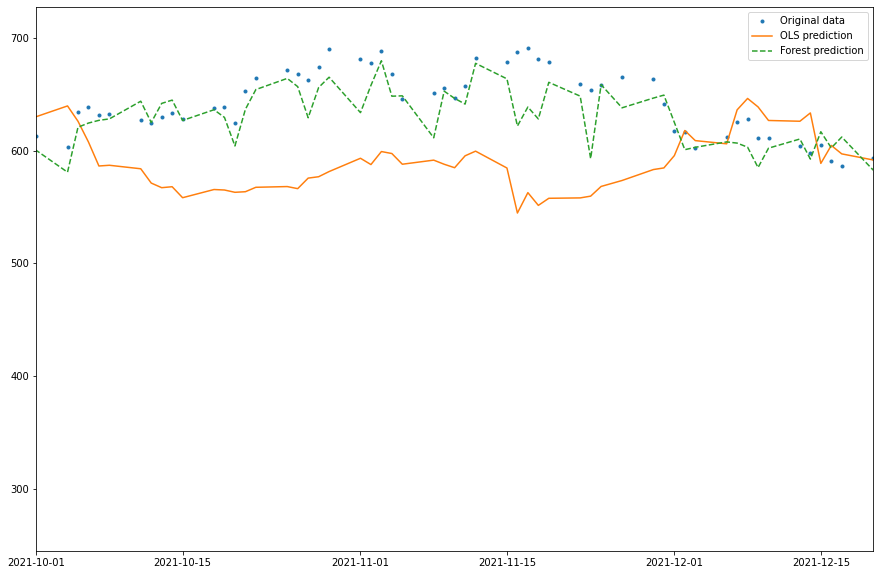

In [ ]:
# check accuracy graphically
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(xTrain.index, yTrain, ".", label="Original data")
ax.plot(xTrain.index, ypred, "-", label="OLS prediction")
ax.plot(xTrain.index, yPred, "--", label="Forest prediction")
ax.legend(loc="best")
ax.set_xlim(xmin=pd.to_datetime('2021-10-01'),xmax=pd.to_datetime('2021-12-20')); # <-- closer look

In [ ]:
pip install forestci

In [ ]:
# make prediction
import forestci as fci
xTest = data_y[['BioN_lag']].copy()
yTest = data_y['NFLX'].copy()
data_y['NFLX_forest'] = model.predict(xTest);
ci = fci.random_forest_error(model, xTrain, xTest);

Failed to import duecredit due to No module named 'duecredit'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeRegressor was 

No calibration with n_samples <= 20


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


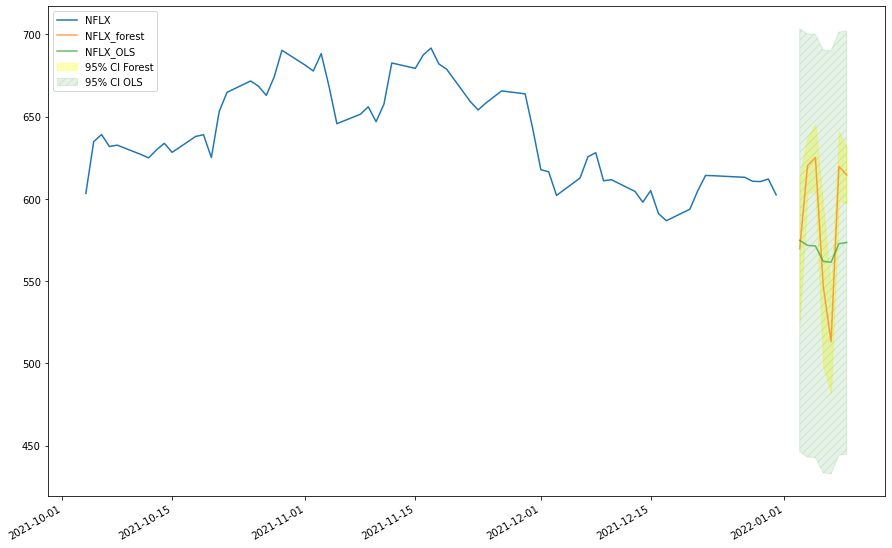

In [ ]:
# predict out of sample 
ax = data_fcst[data_fcst.index > pd.to_datetime('10/01/2021')].plot(y=['NFLX'],figsize=(15,10))
data_y.plot(y=['NFLX_forest'], ax=ax, alpha=.7)
ax.fill_between(data_y.index,
                data_y['NFLX_forest'] - np.sqrt(ci),
                data_y['NFLX_forest'] + np.sqrt(ci), 
                color='yellow', alpha=0.3,
                label='95% CI Forest')

data_y.plot(y=['NFLX_OLS'], ax=ax, alpha=.7)

pred = resFRCST.get_prediction(data_y)
iv_l = pred.summary_frame()["obs_ci_lower"]
iv_u = pred.summary_frame()["obs_ci_upper"]

ax.fill_between(data_y.index,
                iv_l,
                iv_u, color='green', alpha=0.1,
                label='95% CI OLS', hatch='///')
ax.legend(loc='upper left');

In [ ]:
p = [0] # lags
q = [18] # rolling window

# fit model
arimaMod = ARIMA(history['Close'], order=(p, 0, q), trend = 'ct')
arimaFRCST = arimaMod.fit()

print(arimaFRCST.summary());

NameError: ignored

In [ ]:
import pandas as pd
import advertools as adv
import numpy as np

searchID = 'xxxxxxxxxxxxxx' #<- put your search id
apikey = 'xxxxxxxxxxxxxxxxxxxxxxx' #<- put your key here
news = adv.serp_goog(q='bitcoin shiba', gl=['eg'], start= np.arange(1, 100,10), filter=0, cx=searchID, key=apikey)


ModuleNotFoundError: ignored